In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
fruits=pd.read_table('fruit_data_with_colors.txt')
fruits.head()

C:\Users\pc20\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [6]:
fruits.count()

fruit_label      59
fruit_name       59
fruit_subtype    59
mass             59
width            59
height           59
color_score      59
dtype: int64

In [21]:
from matplotlib import cm
x=fruits[['height','width','mass','color_score']]
y=fruits['fruit_label']

x_train,x_test,y_train,y_test=x[:50],x[50:],y[:50],y[50:]

In [26]:
from matplotlib import cm
X=fruits[['height','width','mass']]
y=fruits['fruit_label']

X_train,X_test,y_train,y_test=train_test=train_test_split(X,y,random_state=0)

### create classifier object

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5)

### train the classifier (fit the estimator)using the training data

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
fruit_prediction = knn.predict([[362,9.6,9.2]])
fruit_prediction

array([2], dtype=int64)

In [31]:
fruit_prediction=knn.predict( [ [362,9.6,9.2],[176,7.4,7.2] ] )
fruit_prediction

array([2, 2], dtype=int64)

In [32]:
names={1:'Apple',2:'mandrain',3:'orange',4:'lemon'}
for each in fruit_prediction:
    print(names[each])

mandrain
mandrain


## Estimate the accuracy of the classifier on future data,using the test data

In [33]:
knn.score(X_test,y_test)

0.5333333333333333

In [35]:
k_range=range(1,20)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

<IPython.core.display.Javascript object>


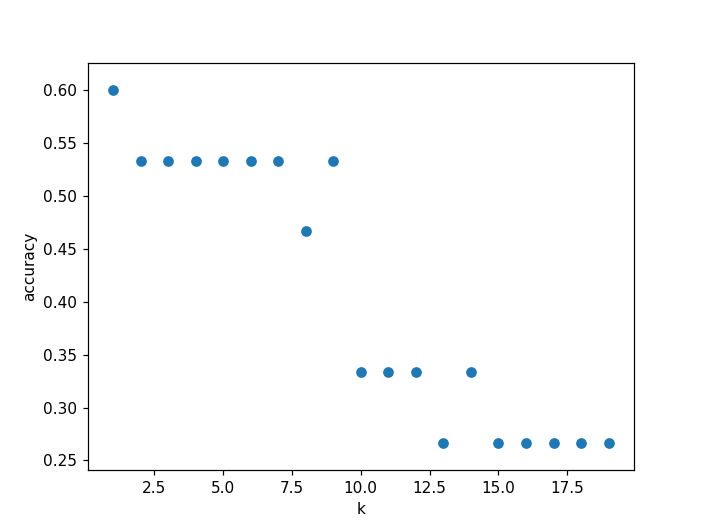

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtricks'

In [36]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xtricks(0,1,2,5,10,15,20)